for detail model implementaion

https://dev.to/lucassul/time-series-forecasting-dha

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')

custom_palette = [
    "#66c2a5",  # greenish
    "#fc8d62",  # orange
    "#8da0cb",  # light blue
    "#e78ac3",  # pink
    "#a6d854"   # lime green
]
sns.set_palette(custom_palette)

# read dataset from csv file
data = pd.read_csv('https://raw.githubusercontent.com/Rohanrathod7/my-ds-projects/main/07_time_functions/project_energy_consumption/Data/energydata_complete.csv')
# load the dataset
data_target = pd.read_csv('https://raw.githubusercontent.com/Rohanrathod7/my-ds-projects/main/07_time_functions/project_energy_consumption/Data/energydata_complete.csv', usecols=[1], engine='python')

# set standard color variable
color = "#1f77b4"

# display first few lines to make sure correctly import
display(data.head())

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


Variables Description：

T1: Temperature in kitchen area, in Celsius

T2: Temperature in living room area, in Celsius

T3: Temperature in laundry room area, in Celsius

T4: Temperature in office room, in Celsius

T5: Temperature in bathroom, in Celsius

T6: Temperature outside the building (north side), in Celsius

T7: Temperature in ironing room , in Celsius

T8: Temperature in teenager room 2, in Celsius

T9: Temperature in parents room, in Celsius

RHI: Humidity in kitchen area, in %

RH2: Humidity in living room area, in %

RH3: Humidity in laundry room area, in %

RH4: Humidity in office room, in %

RH5: Humidity in bathroom, in %

RH6: Humidity outside the building (north side), in %

RH7: Humidity in ironing room, in %

RH8: Humidity in teenager room 2,in %

RH9: Humidity in parents room, in %

To: Temperature outside (from Chievres weather station), in Celsius

Pressure: (from Chievres weather station), in mm Hg

Hg RHout: Humidity outside (from Chievres weather station), in %

Wind speed: (from Chievres weather station), in m/s

Visibility: (from Chievres weather station), in km

Tdewpoint: (from Chievres weather station), A*C

Appliances, energy use in Wh: Dependent variable

## Check data's basic information

In [104]:
# Check data scale
data.shape

(19735, 29)

In [105]:
# Check data types
data.dtypes

,0
date,object
Appliances,int64
lights,int64
T1,float64
RH_1,float64
T2,float64
RH_2,float64
T3,float64
RH_3,float64
T4,float64


In [106]:
# Check for missing values
data.isnull().sum()

,0
date,0
Appliances,0
lights,0
T1,0
RH_1,0
T2,0
RH_2,0
T3,0
RH_3,0
T4,0


In [107]:
# Check if we have any duplicated data
any(data.duplicated())

False

In [108]:
# Convert 'date' column to datetime format, so that we could use it for analyse with time series functionality
data['date'] = pd.to_datetime(data['date'])

## Exploratory Data Analysis (EDA)

### Add Features

In [109]:
# Copy dataset for time-based analysis
new_data = data.copy()
new_data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [110]:
# Converting date into datetime
new_data['date'] = new_data['date'].astype('datetime64[ns]')
new_data['Date'] = pd.to_datetime(new_data['date']).dt.date
new_data['Time'] = pd.to_datetime(new_data['date']).dt.time
new_data['hour'] = new_data['date'].dt.hour
new_data['month'] = new_data['date'].dt.month
new_data['day_of_week'] = new_data['date'].dt.dayofweek

new_data= new_data.drop(["date"], axis=1)
new_data

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Windspeed,Visibility,Tdewpoint,rv1,rv2,Date,Time,hour,month,day_of_week
0,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,7.000000,63.000000,5.300000,13.275433,13.275433,2016-01-11,17:00:00,17,1,0
1,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,6.666667,59.166667,5.200000,18.606195,18.606195,2016-01-11,17:10:00,17,1,0
2,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,6.333333,55.333333,5.100000,28.642668,28.642668,2016-01-11,17:20:00,17,1,0
3,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,6.000000,51.500000,5.000000,45.410389,45.410389,2016-01-11,17:30:00,17,1,0
4,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,5.666667,47.666667,4.900000,10.084097,10.084097,2016-01-11,17:40:00,17,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,3.333333,23.666667,13.333333,43.096812,43.096812,2016-05-27,17:20:00,17,5,4
19731,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,3.500000,24.500000,13.300000,49.282940,49.282940,2016-05-27,17:30:00,17,5,4
19732,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,3.666667,25.333333,13.266667,29.199117,29.199117,2016-05-27,17:40:00,17,5,4
19733,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,...,3.833333,26.166667,13.233333,6.322784,6.322784,2016-05-27,17:50:00,17,5,4


**Hourly distribution of target variable**

In [111]:
# Calculate the total energy consumed by the appliance per hour
app_hour = new_data.groupby(by='hour',as_index=False)['Appliances'].sum()
# Sort app_hour by descending order
app_hour.sort_values(by='Appliances',ascending=False)

,hour,Appliances
18,18,156670
17,17,133600
19,19,117600
11,11,109430
20,20,104380
10,10,103060
13,13,102540
12,12,101630
16,16,98560
9,9,92710


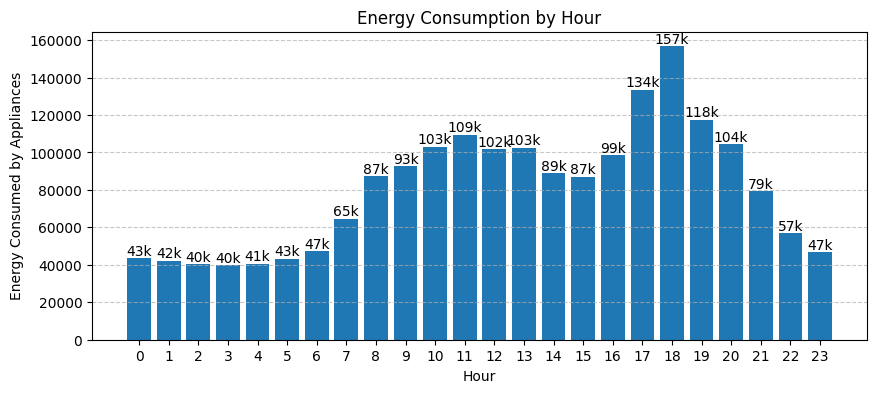

In [112]:
# Function to format the numerical value to 'k' format
def format_value(value):
    if value < 1000:
        return f"{value:.0f}"
    elif value < 10000:
        return f"{value/1000:.1f}k"
    else:
        return f"{value/1000:.0f}k"

# Plotting the data
plt.figure(figsize=(10, 4))  # Set the figure size
bars = plt.bar(app_hour['hour'], app_hour['Appliances'], color=color)  # Create a bar plot

# Add numerical values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, format_value(height), ha='center', va='bottom')

plt.xlabel('Hour')  # Set the x-axis label
plt.ylabel('Energy Consumed by Appliances')  # Set the y-axis label
plt.title('Energy Consumption by Hour')  # Set the title
plt.xticks(app_hour['hour'])  # Set the x-axis ticks to match the hours
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines to the y-axis
plt.show()  # Show the plot

**Weekday distribution of target variable**

In [113]:
# Calculate the total energy consumed by the appliance per hour
app_week_day = new_data.groupby(by='day_of_week',as_index=False)['Appliances'].sum()
# Sort app_hour by descending order
app_week_day.sort_values(by='Appliances',ascending=False)

,day_of_week,Appliances
0,0,309610
4,4,297650
5,5,290690
3,3,260450
6,6,259690
2,2,259000
1,1,250920


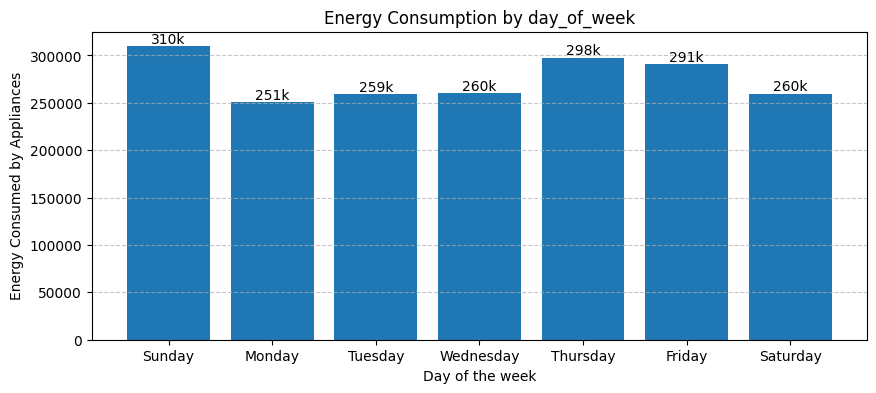

In [114]:
day_names = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 0: 'Sunday'}

# Plotting the data
plt.figure(figsize=(10, 4))  # Set the figure size
bars = plt.bar(app_week_day['day_of_week'], app_week_day['Appliances'], color=color)  # Create a bar plot

# Add numerical values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, format_value(height), ha='center', va='bottom')

plt.xlabel('Day of the week')  # Set the x-axis label
plt.ylabel('Energy Consumed by Appliances')  # Set the y-axis label
plt.title('Energy Consumption by day_of_week')  # Set the title
plt.xticks(list(day_names.keys()), list(day_names.values()))
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines to the y-axis
plt.show()  # Show the plot

# ->electricity consumption on Sundays is significantly higher than on other days, approximately 10%.

**General view of the whole dataset**  

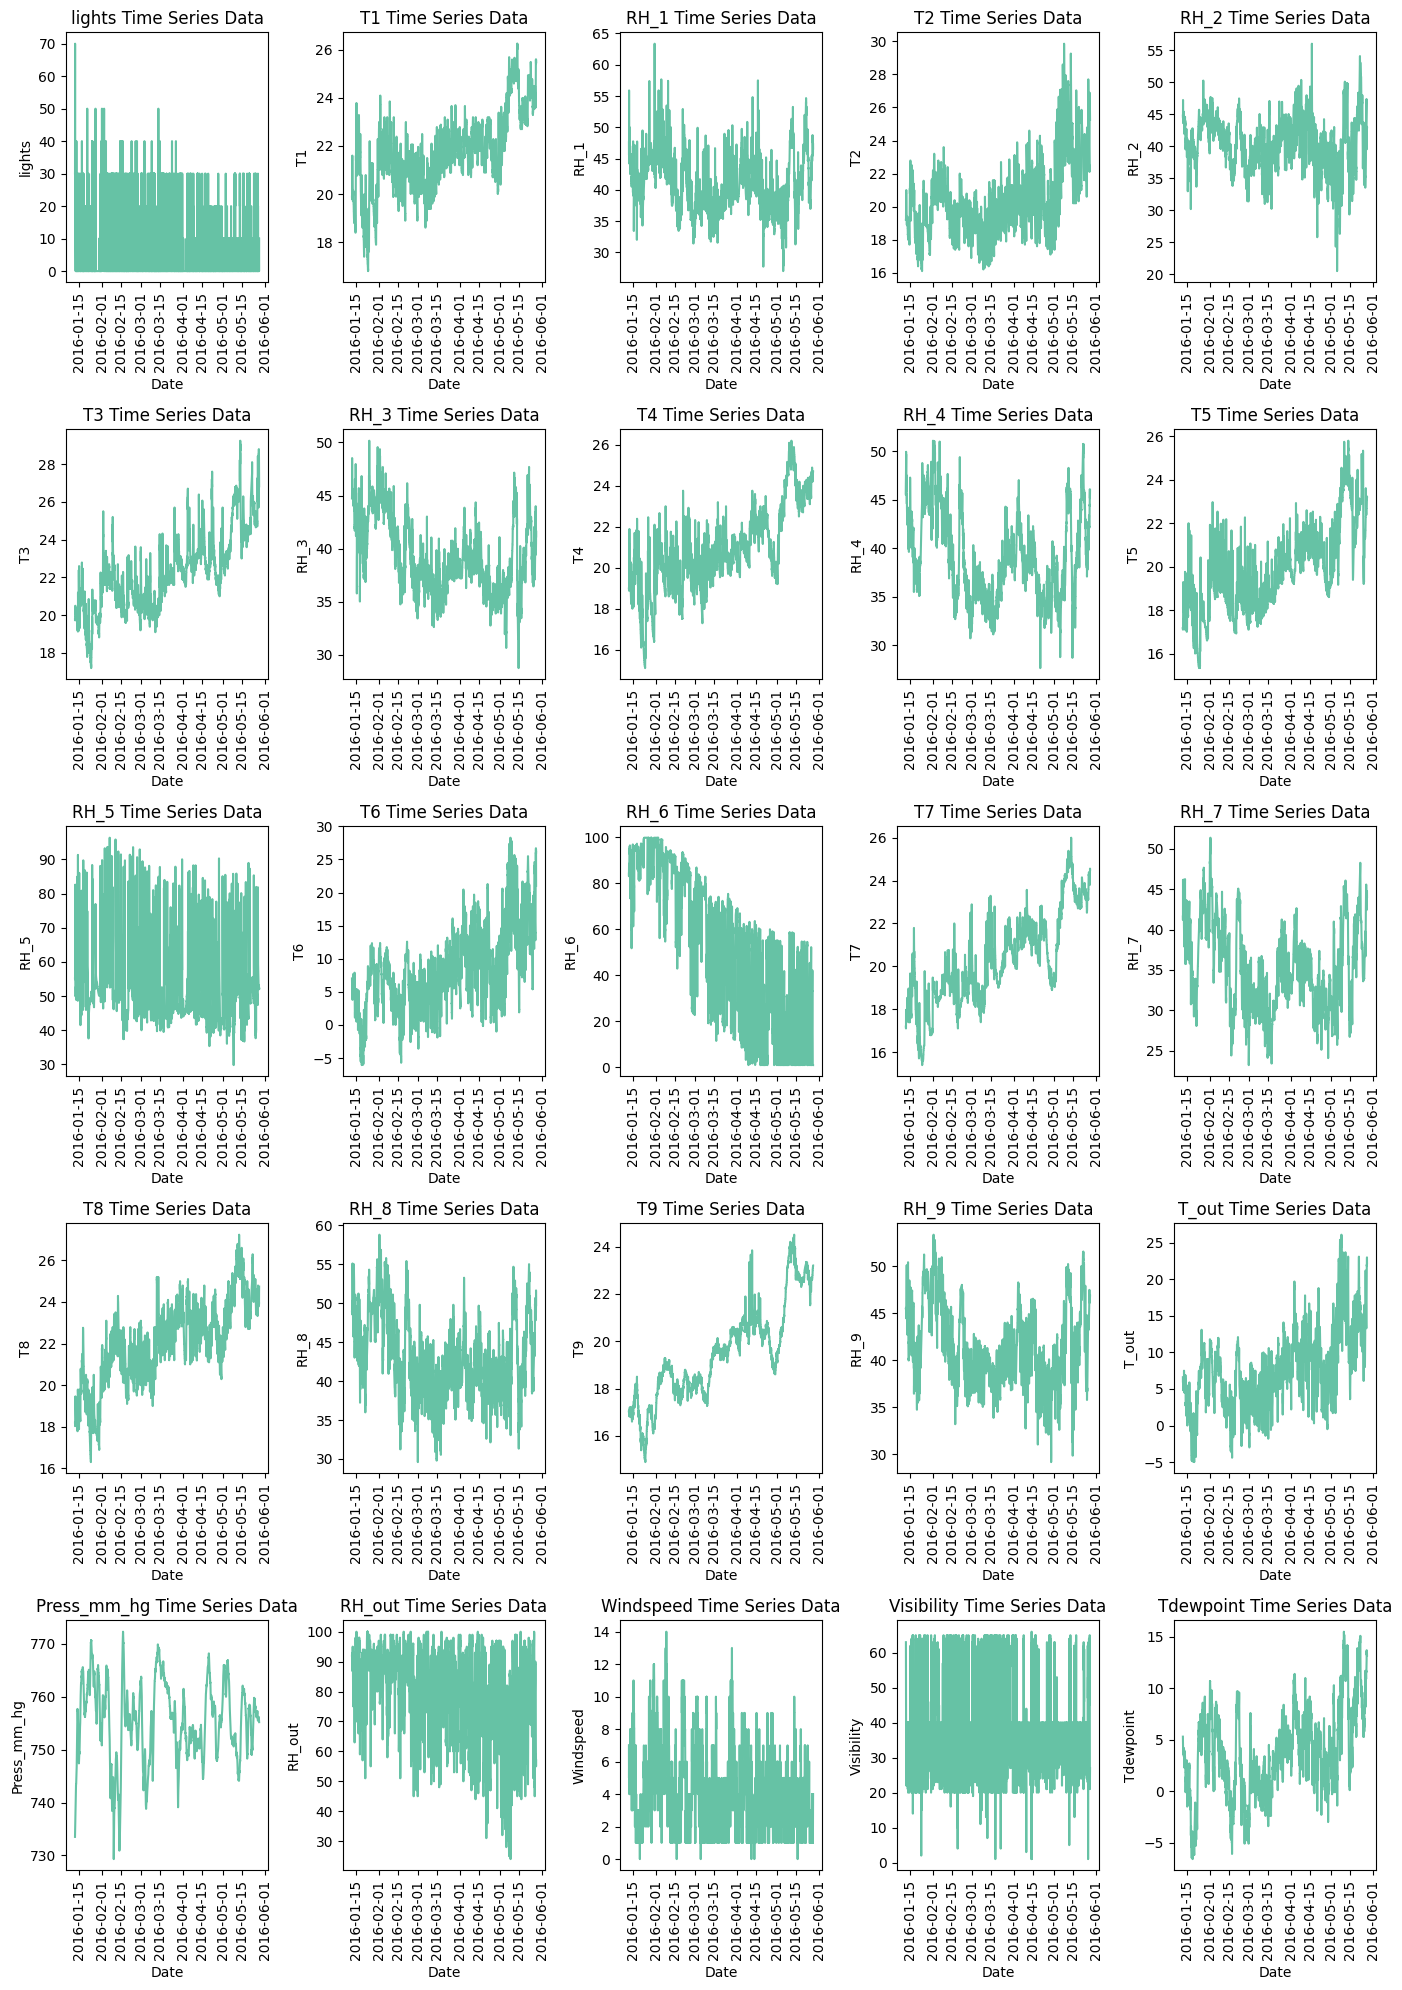

In [100]:
# Filter columns excluding 'rv1' and 'rv2'
selected_columns = [col for col in data.columns[2:] if col not in ['rv1', 'rv2']]

# Determine the number of rows needed for the subplots
num_cols = len(selected_columns)
num_rows = (num_cols - 1) // 5 + 1

# Create subplots
fig, axs = plt.subplots(num_rows, 5, figsize=(14, num_rows*4))

# Loop through selected columns and plot time series on subplots
for i in range(num_rows):
    for j in range(5):
        index = i * 5 + j
        if index < num_cols:
            var = selected_columns[index]
            sns.lineplot(y=data[var], x=data['date'], ax=axs[i,j], linewidth=1.5)
            axs[i,j].set_xlabel('Date')
            axs[i,j].set_ylabel(var)
            axs[i,j].set_title('{} Time Series Data'.format(var))
            axs[i,j].tick_params(axis='x', rotation=90)
        else:
            axs[i,j].axis('off')

plt.tight_layout()
plt.show()

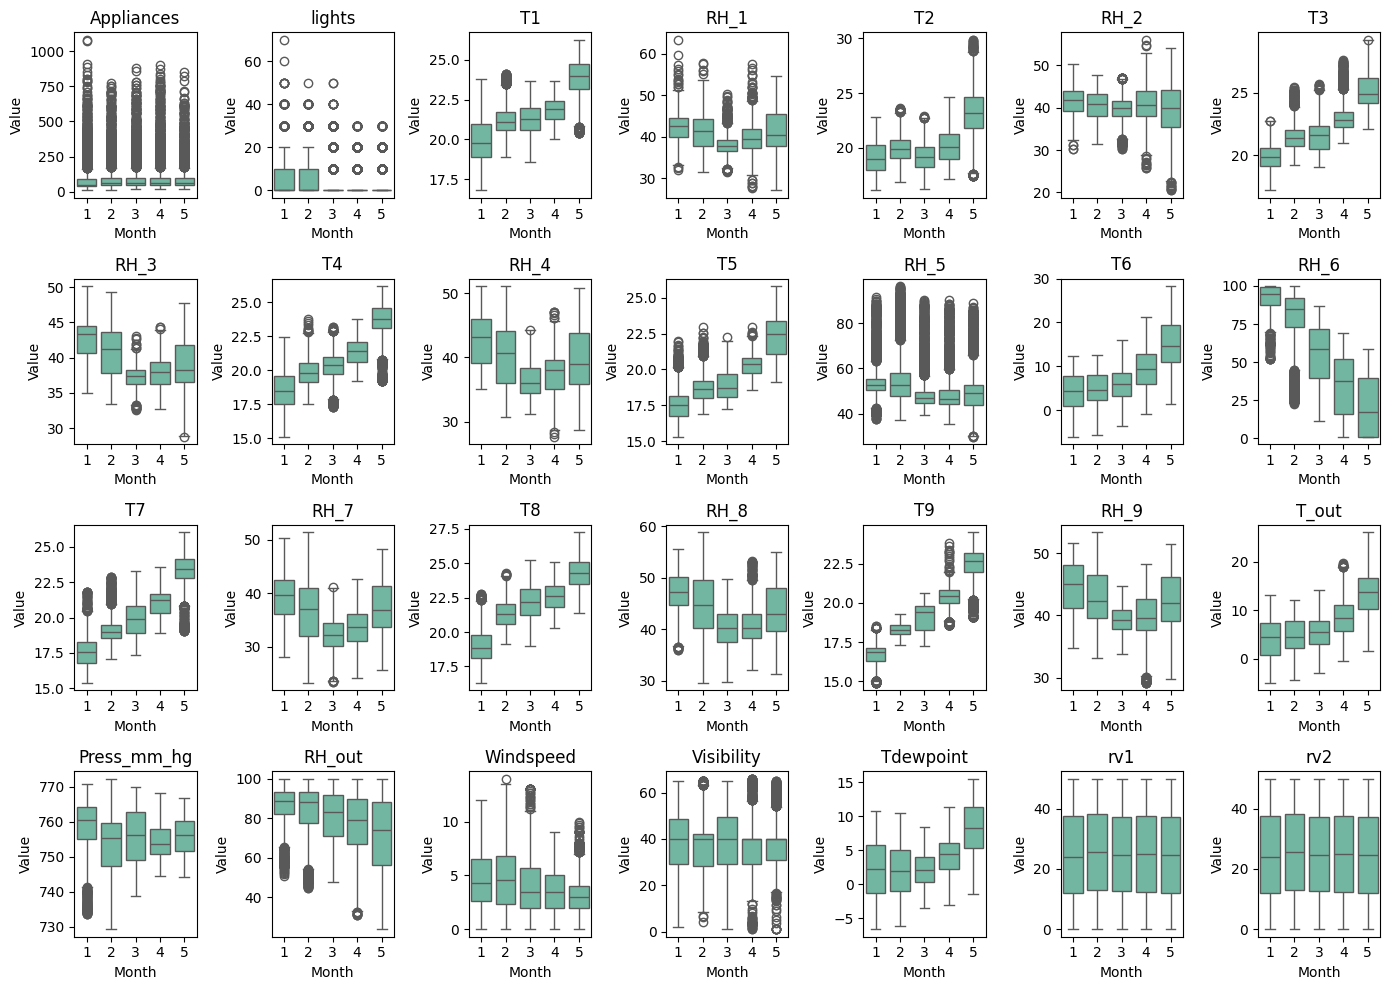

In [101]:
# Extracting numerical columns from the data
numerical = ['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3',
             'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
             'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out',
             'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']

# Create subplots
fig, axs = plt.subplots(4, 7, figsize=(14, 10))

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Loop through each numerical column and plot its distribution
for i, col in enumerate(numerical):
    ax = axs[i]
    sns.boxplot(x=data['date'].dt.month, y=data[col], ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Month')
    ax.set_ylabel('Value')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# For temperature (T), there is an overall increasing trend in the data.
# This is in line with common sense, as the seasons transition from winter to spring in the Northern Hemisphere. Other data show no significant features.

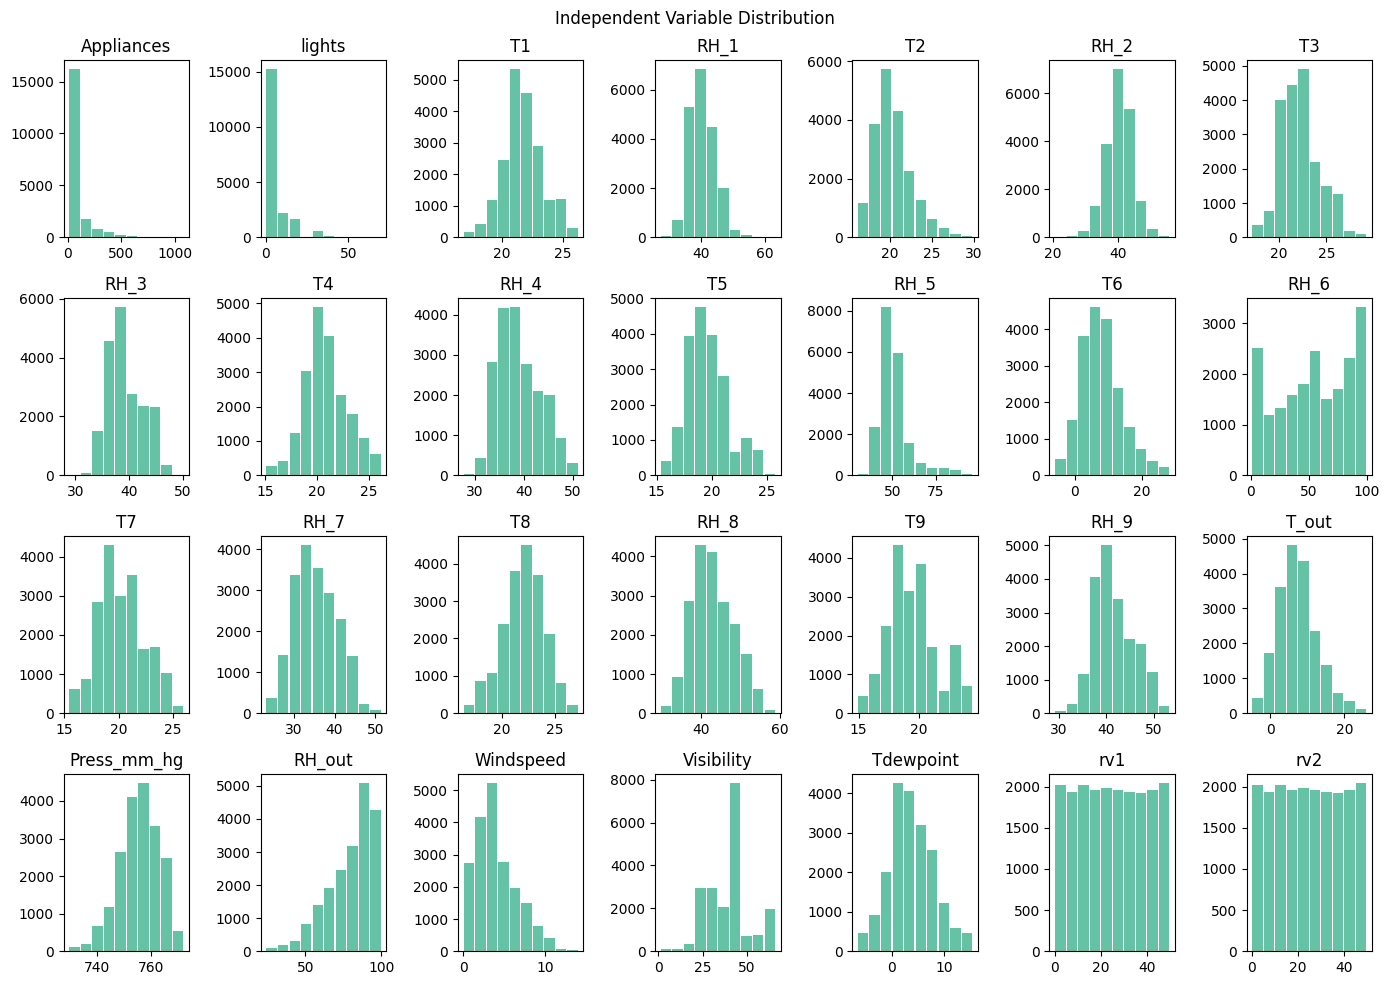

In [102]:
# Creating subplots
fig, axs = plt.subplots(4, 7, figsize=(14, 10))

# Counter for accessing columns
cpt = 0

# Looping through subplots and plotting histograms for each numerical column
for i in range(4):
    for j in range(7):
        var = numerical[cpt]
        axs[i,j].hist(data[var].values, rwidth=0.9)
        axs[i,j].set_title(var)
        cpt += 1

fig.suptitle('Independent Variable Distribution')

# Adjusting layout and displaying the plot
plt.tight_layout()
plt.show()

We can observe the shape of the distribution for each feature. For example, features like temperature and humidity may show a normal distribution, while others might be skewed or have multiple peaks.

We can also see that rv1 and rv2 are just random values added, and could be ignored if data other than 'Appliances' is used.

A closer look at Appliances
Appliances is our key study object, so we want a closer look at it.

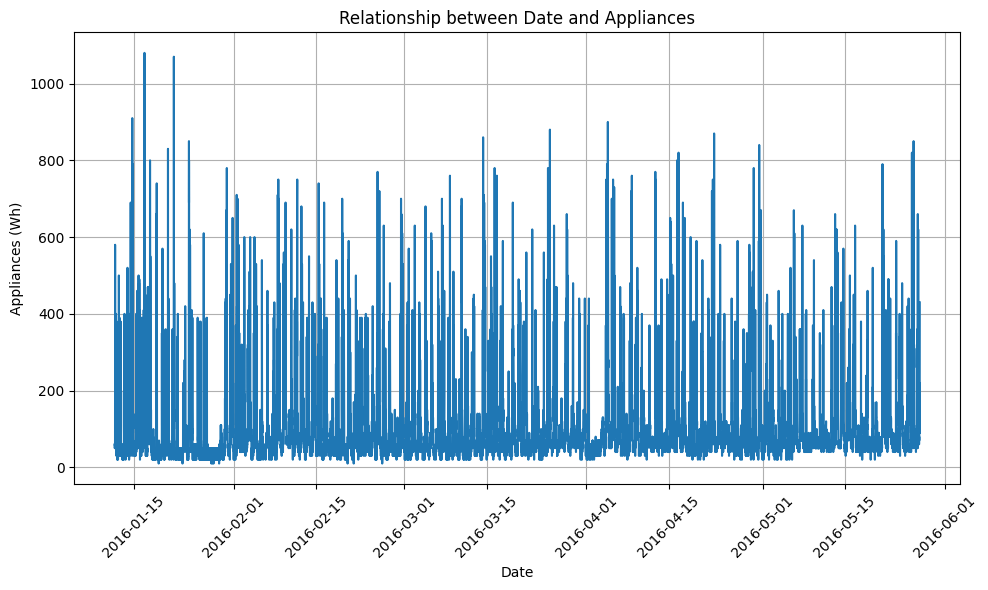

In [115]:
# Plot the relationship between 'date' and 'Appliances'
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(data['date'], data['Appliances'], color='#1f77b4',  linestyle='-')  # Plot with markers
plt.title('Relationship between Date and Appliances')
plt.xlabel('Date')
plt.ylabel('Appliances (Wh)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

From above we can see that there is no visually strong pattern between electricity comsumption -- 'Appliances', and date. However, this absence of a conspicuous pattern doesn't necessarily imply that the data lacks underlying structure. On the contrary, it underscores the importance of our task to uncover and understand the latent patterns hidden within the data.

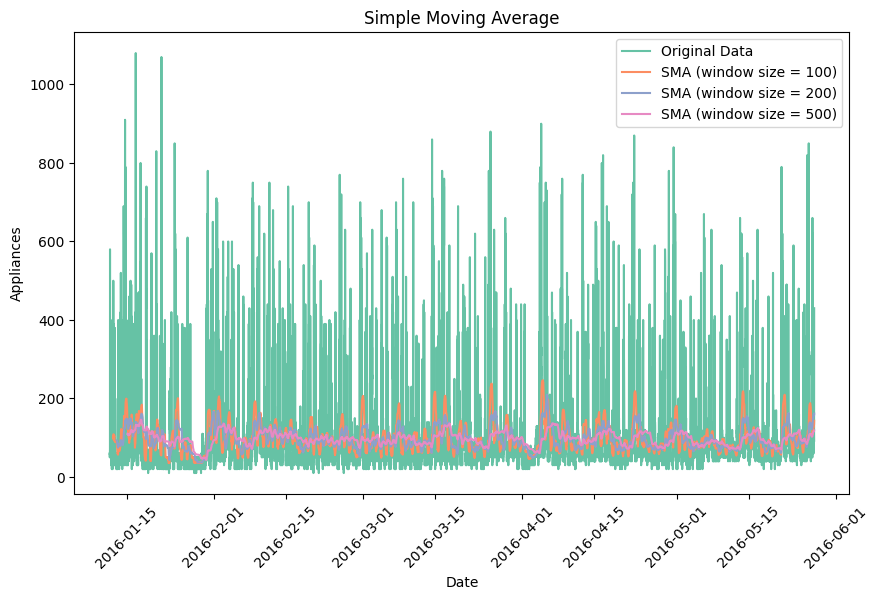

In [116]:
# Calculating the simple moving averages (SMA) of the 'Appliances' column in the data DataFrame using different window sizes
window_size_1 = 100
window_size_2 = 200
window_size_3 = 500
sma_1 = data['Appliances'].rolling(window=window_size_1).mean() # get the mean in the time span of 100 past data entries
sma_2 = data['Appliances'].rolling(window=window_size_2).mean() # get the mean in the time span of 200 past data entries
sma_3 = data['Appliances'].rolling(window=window_size_3).mean() # get the mean in the time span of 300 past data entries

# Draw the plt
plt.figure(figsize=(10, 6))
plt.plot(data['date'], data['Appliances'], label='Original Data')
plt.plot(data['date'], sma_1, label='SMA (window size = {})'.format(window_size_1))
plt.plot(data['date'], sma_2, label='SMA (window size = {})'.format(window_size_2))
plt.plot(data['date'], sma_3, label='SMA (window size = {})'.format(window_size_3))
plt.xlabel('Date')
plt.ylabel('Appliances')
plt.title('Simple Moving Average')
plt.legend()

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

plt.show()

After applying the Simple Moving Average (SMA) model with window sizes of 100, 200, and 500, and closely observing the resulting graphs, no significant trends were discernible at a first glance. This suggests that the 'Appliances' value remains relatively stable (stationary) throughout the duration of the data capture.

**Visualization of Randomly Selected Weekly Data**

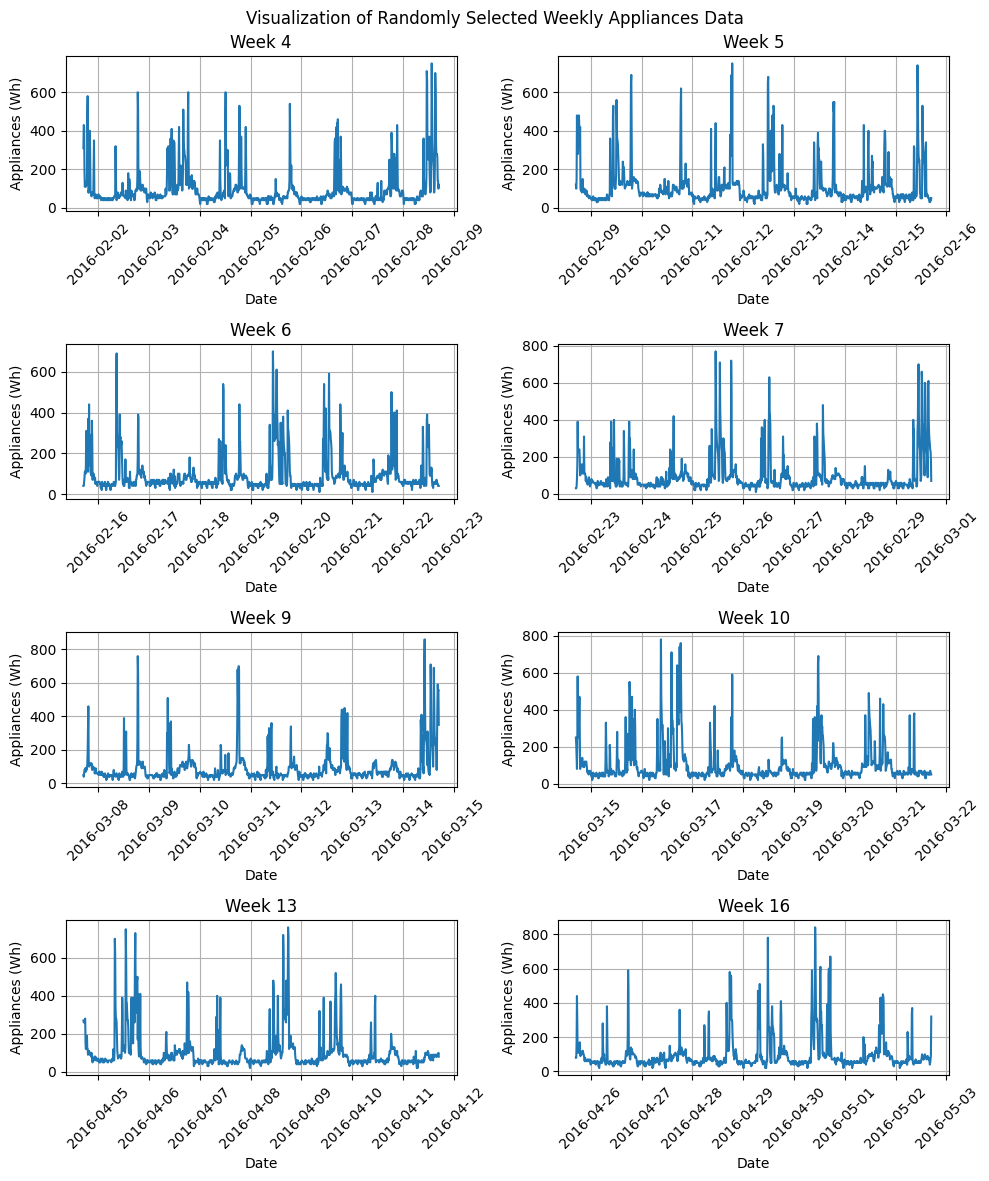

In [117]:
import random

len_weekly_data = 6*24*7 # 10 entries per minute => 6 times per hour => * 24 h * 7 days

# Function to randomly select 8 different weeks from the entire time range
def select_random_weeks(data):
    # Determine the total number of complete weeks
    num_weeks = len(data) // len_weekly_data
    # Randomly select 8 different week indices
    random_week_indices = random.sample(range(num_weeks), 8)
    # Sort the selected week indices
    random_week_indices.sort()
    return random_week_indices

# Randomly select 8 different weeks
random_week_indices = select_random_weeks(data)

# Create subplots arranged in a 4x2 grid
fig, axs = plt.subplots(4, 2, figsize=(10, 12))
fig.suptitle('Visualization of Randomly Selected Weekly Appliances Data')

# Plotting each randomly selected week's data
for i in range(4):
    for j in range(2):
        # Calculate the start and end index for the randomly selected week
        start_index = random_week_indices[i * 2 + j] * len_weekly_data
        end_index = start_index + len_weekly_data

        # Filter data for the randomly selected week
        week_data = data.iloc[start_index:end_index]

        # Plotting the relationship between 'date' and 'Appliances' for the randomly selected week
        axs[i, j].plot(week_data['date'], week_data['Appliances'], color='#1f77b4', linestyle='-')
        axs[i, j].set_title(f'Week {random_week_indices[i * 2 + j] + 1}')
        axs[i, j].set_xlabel('Date')
        axs[i, j].set_ylabel('Appliances (Wh)')
        axs[i, j].tick_params(axis='x', rotation=45)
        axs[i, j].grid(True)

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()
plt.show()

Upon analyzing the randomly selected weekly data, a discernible pattern emerged, indicating consistent fluctuations in energy consumption. Despite the random sampling, recurring trends were evident, suggesting underlying patterns in appliance usage throughout the observed time period. This consistency hints at potential factors influencing energy consumption behavior. This aligns with our Hourly Analysis previously.

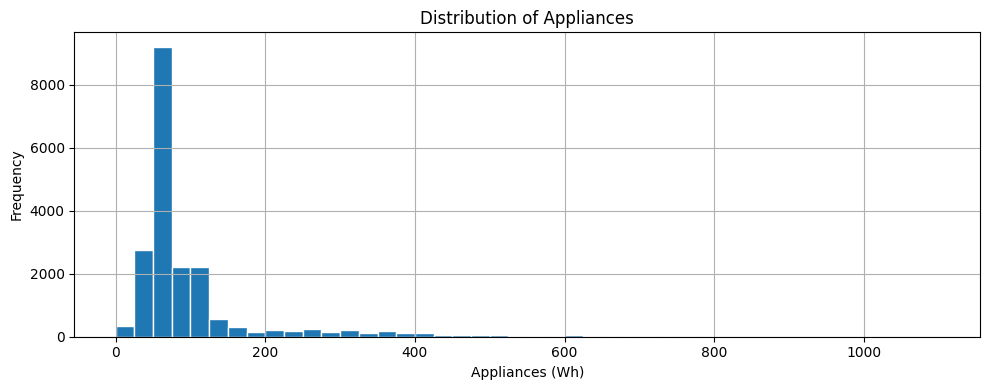

In [118]:
# Plotting the histogram for the "Appliances" column
plt.figure(figsize=(10, 4))  # Setting the figure size
bin_width = 25  # Define the bin width
max_value = int(max(data['Appliances']))
bins = range(0, max_value + bin_width, bin_width)  # Define the bins with a gap of 50 units starting from 0
plt.hist(data['Appliances'], bins=bins, color='#1f77b4', edgecolor='white')  # Plotting histogram with specified bins
plt.title('Distribution of Appliances')  # Adding title
plt.xlabel('Appliances (Wh)')  # Adding x-axis label
plt.ylabel('Frequency')  # Adding y-axis label
plt.grid(True)  # Adding gridlines
plt.tight_layout()  # Adjusting layout to prevent clipping of labels
plt.show()  # Displaying the plot

### Correlation analysis

In [119]:
# Delete date time stamps and irrelavant columns
new_data = new_data.drop(['Date', 'Time', 'rv1', 'rv2'], axis=1)

# Auto-check if there is any format that is not 'float64' or 'int64'
for column in new_data.columns:
    if new_data[column].dtype != 'float64' and new_data[column].dtype != 'int64':
        print(f"Column '{column}' has non-numeric data type: {new_data[column].dtype}")


Column 'hour' has non-numeric data type: int32
Column 'month' has non-numeric data type: int32
Column 'day_of_week' has non-numeric data type: int32


In [120]:
# We can see from above that the 'hour' 'month' and 'day_of_week' is of data type 'int32', which cannot be used for correlation analysis
# We should change the format first.

new_data['hour'] = new_data['hour'].astype(float)
new_data['month'] = new_data['month'].astype(float)
new_data['day_of_week'] = new_data['day_of_week'].astype(float)

# Check type again.
print(new_data.dtypes)

Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
hour           float64
month          float64
day_of_week    float64
dtype: object


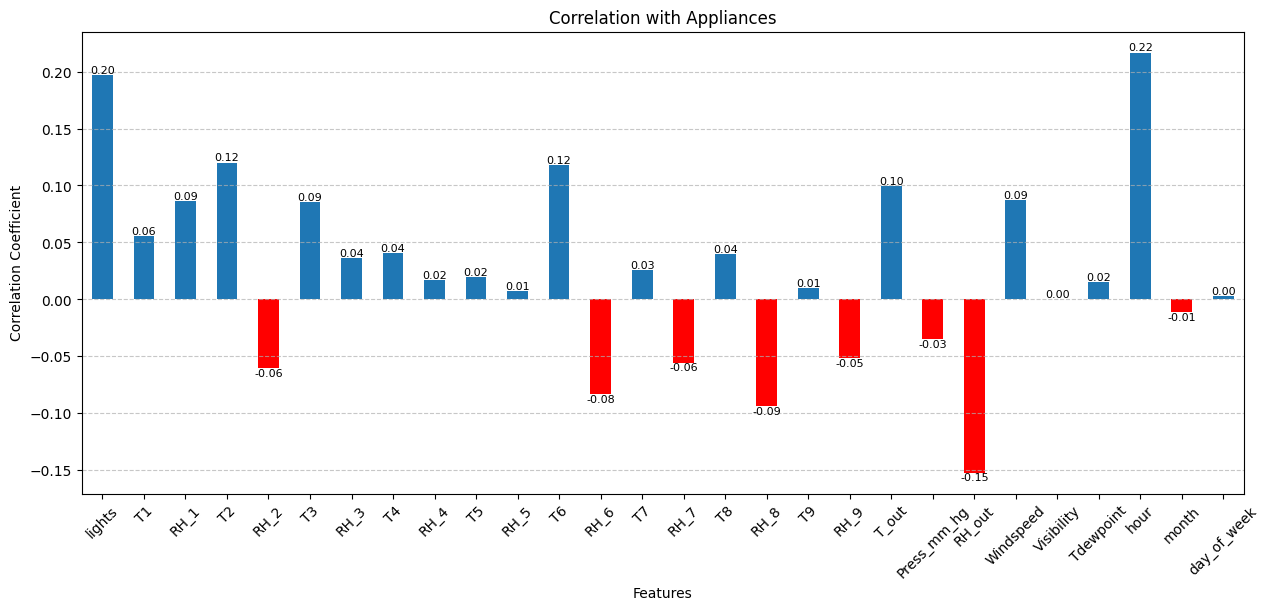

In [121]:
# Calculate correlation coefficients
correlations = new_data.corr()['Appliances'].drop(['Appliances'])

# Plotting the correlations
plt.figure(figsize=(15, 6))

# Define colors based on correlation values
colors = ['red' if corr < 0 else '#1f77b4' for corr in correlations]

# Plot the bar chart with custom colors
bars = correlations.plot(kind='bar', color=colors)

# Add text annotations
for i, corr in enumerate(correlations):
    if corr < 0:
        plt.text(i, corr, f"{corr:.2f}", ha='center', va='top', fontsize=8)
    else:
        plt.text(i, corr, f"{corr:.2f}", ha='center', va='bottom', fontsize=8)


plt.title('Correlation with Appliances')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

We can observe that the strongest correlation, standing at 0.22, exists between appliances consumption and the time of day (hour). This is followed by lights with a correlation coefficient of 0.2, and air pressure with a correlation coefficient of -0.15. This indicates that 'hour' and 'lights' predominantly influence home appliances' electricity consumption.

Additionally, the positive correlation coefficients for 'hour' and 'lights' imply that as the time of day increases or as more lights are turned on, there is a tendency for higher appliances consumption. Conversely, the negative correlation coefficient for air pressure suggests a slight decrease in appliances consumption as air pressure rises. This highlights the significance of considering temporal factors and household activities in understanding and managing electricity consumption.

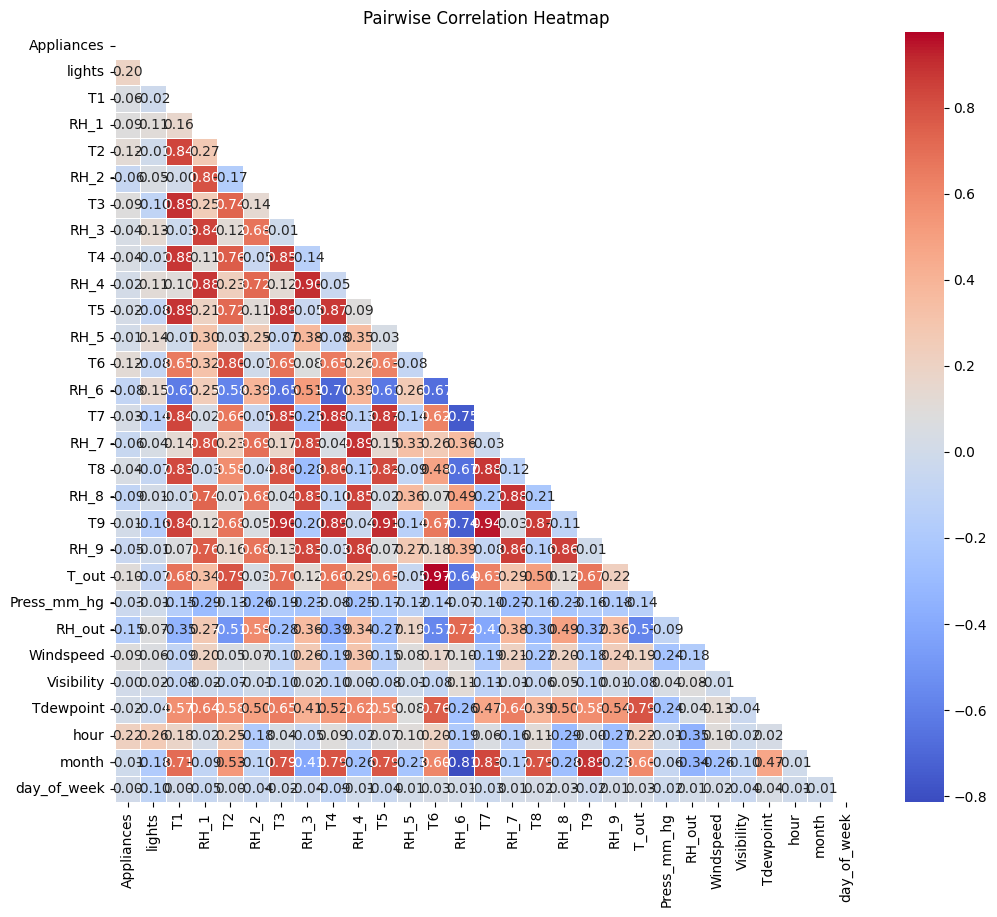

In [122]:
# Calculate pairwise correlations
corr_matrix = new_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)

plt.title('Pairwise Correlation Heatmap')
plt.show()

Here I visually present the correlations among different features using a heatmap. It reveals strong positive correlations among temperatures and weak positive correlations among humidity levels. RH_6 (outdoor humidity) stands out as it exhibits strong negative correlations with temperatures, indicating that as temperatures rise, humidity levels decrease.

In contrast to the correlations among temperatures and humidities, the correlation between our target variable 'Appliances' and these variables appears insignificant.

**Clustering Analysis**

In [123]:
# Selecting features for clustering (excluding 'Appliances' since it's the target feature) that with an abstract value of over 0.06.
data_cluster = new_data[['Appliances','lights','T2','RH_2','T3','T6','RH_6','RH_7','RH_8','T_out','Press_mm_hg','RH_out','hour']]
data_cluster

,Appliances,lights,T2,RH_2,T3,T6,RH_6,RH_7,RH_8,T_out,Press_mm_hg,RH_out,hour
0,60,30,19.200000,44.790000,19.790000,7.026667,84.256667,41.626667,48.900000,6.600000,733.5,92.000000,17.0
1,60,30,19.200000,44.722500,19.790000,6.833333,84.063333,41.560000,48.863333,6.483333,733.6,92.000000,17.0
2,50,30,19.200000,44.626667,19.790000,6.560000,83.156667,41.433333,48.730000,6.366667,733.7,92.000000,17.0
3,50,40,19.200000,44.590000,19.790000,6.433333,83.423333,41.290000,48.590000,6.250000,733.8,92.000000,17.0
4,60,40,19.200000,44.530000,19.790000,6.366667,84.893333,41.230000,48.590000,6.133333,733.9,92.000000,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,0,25.890000,42.025714,27.200000,24.796667,1.000000,44.500000,50.074000,22.733333,755.2,55.666667,17.0
19731,90,0,25.754000,42.080000,27.133333,24.196667,1.000000,44.414286,49.790000,22.600000,755.2,56.000000,17.0
19732,270,10,25.628571,42.768571,27.050000,23.626667,1.000000,44.400000,49.660000,22.466667,755.2,56.333333,17.0
19733,420,10,25.414000,43.036000,26.890000,22.433333,1.000000,44.295714,49.518750,22.333333,755.2,56.666667,17.0


In [124]:
scaler = StandardScaler()
data_cluster_scaled = scaler.fit_transform(data_cluster)

In [125]:
from sklearn.cluster import KMeans

# Create a KMeans analyzer
kmeans = KMeans(n_clusters=5, random_state=42)

# Run the KMeans analysis
kmeans.fit(data_cluster_scaled)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the 'cluster' column to the DataFrame
data_cluster['cluster'] = cluster_labels

# Print the size of each cluster
for cluster_label in range(5):
    cluster_size = len(cluster_labels[cluster_labels == cluster_label])
    print(f"Cluster {cluster_label}: {cluster_size} data points")

Cluster 0: 4822 data points
Cluster 1: 4732 data points
Cluster 2: 4236 data points
Cluster 3: 3328 data points
Cluster 4: 2617 data points


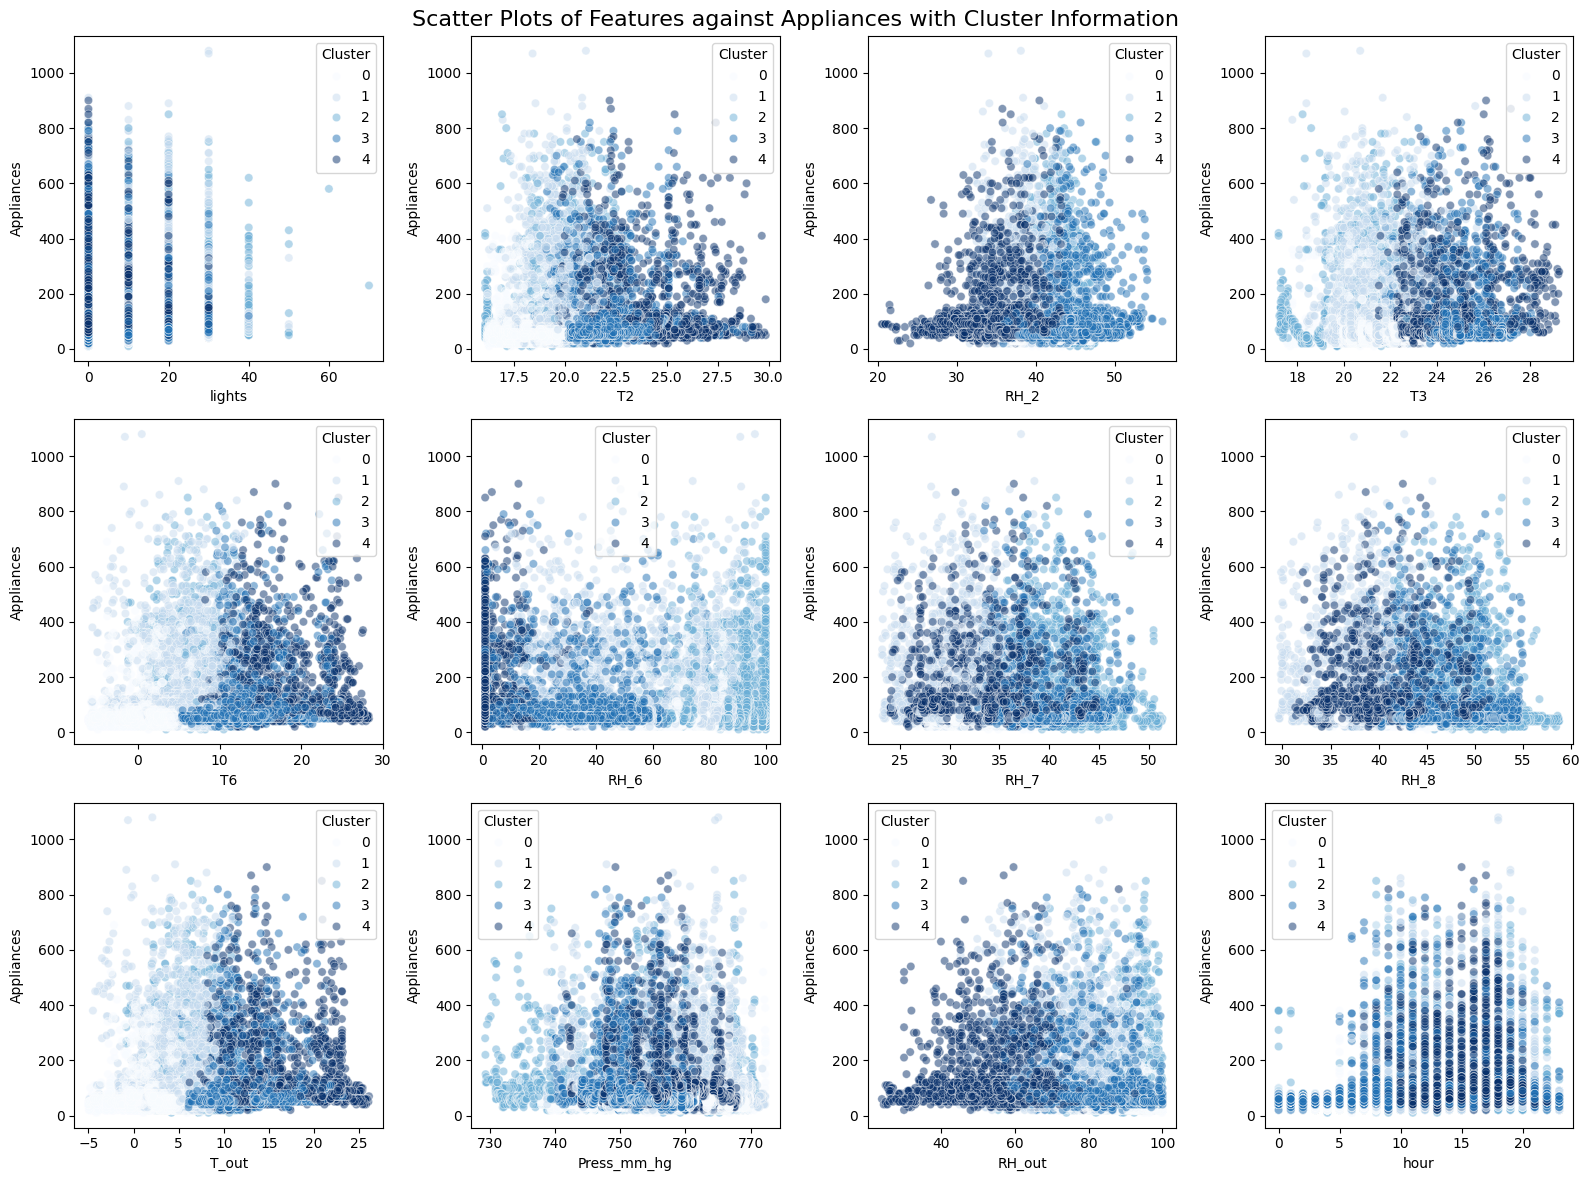

In [126]:
# Create a subplot grid containing all features
fig, axs = plt.subplots(3, 4, figsize=(16, 12))

# Flatten axs into a 1D array for iteration
axs = axs.flatten()

# Get the names of all feature columns except the target variable 'Appliances'
feature_columns = data_cluster.columns.drop('Appliances')

# Plot scatter plot of each feature against the target variable 'Appliances' and color by cluster
for i, feature in enumerate(feature_columns):
    # Check if the subplot index is within bounds
    if i < len(axs):
        sns.scatterplot(x=feature, y='Appliances', hue='cluster', data=data_cluster, ax=axs[i], alpha=0.5, palette='Blues')
        axs[i].set_xlabel(feature)
        axs[i].set_ylabel('Appliances')
        axs[i].legend(title='Cluster')

plt.suptitle('Scatter Plots of Features against Appliances with Cluster Information', fontsize=16)

# Adjust spacing and layout of subplots
plt.tight_layout()
plt.show()

for detail model implementaion

https://dev.to/lucassul/time-series-forecasting-dha